# Take a look at the data set

In [179]:
%env PYTHONHASHSEED=0
%load_ext autoreload
%autoreload 2

env: PYTHONHASHSEED=0
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [180]:
import numpy as np
import pandas as pd
np.random.seed(42)

from tv_show_recommender.data.functions import get_split_data, get_all_data, stratified_shuffle


In [181]:
data = get_all_data()

In [182]:
data.head()

show_id   user_id  rating  primary_title  start_year end_year  \
0  2402207   2860723       7  The Last Ship        2014     2018   
1  2402207  22484170       8  The Last Ship        2014     2018   
2  2402207     11762       7  The Last Ship        2014     2018   
3  2402207  44112735       5  The Last Ship        2014     2018   
4  2402207  18044142       2  The Last Ship        2014     2018   

                genres  average_rating  num_votes  
0  Action,Drama,Sci-Fi             7.4      62634  
1  Action,Drama,Sci-Fi             7.4      62634  
2  Action,Drama,Sci-Fi             7.4      62634  
3  Action,Drama,Sci-Fi             7.4      62634  
4  Action,Drama,Sci-Fi             7.4      62634

In [183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517309 entries, 0 to 517308
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   show_id         517309 non-null  int64  
 1   user_id         517309 non-null  int64  
 2   rating          517309 non-null  int64  
 3   primary_title   517309 non-null  object 
 4   start_year      517309 non-null  int64  
 5   end_year        517309 non-null  object 
 6   genres          517309 non-null  object 
 7   average_rating  517309 non-null  float64
 8   num_votes       517309 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 35.5+ MB


In [184]:
# Number of ratings per show
data['show_id'].value_counts()

show_id
11912196    1271
14392248    1271
12004706    1270
9778022     1268
9680440     1268
            ... 
112064         7
3671754        6
88491          4
60019          4
421291         3
Name: count, Length: 1722, dtype: int64

In [185]:
data['genres'].value_counts()

genres
Crime,Drama,Mystery           35428
Action,Adventure,Drama        34027
Action,Crime,Drama            26048
Action,Adventure,Animation    25997
Comedy,Drama                  25023
                              ...  
Adventure,Reality-TV             34
Animation,Sport,Thriller         26
Adventure,Animation,Family       19
Animation,Comedy,Sci-Fi          17
Action,Comedy,Reality-TV         15
Name: count, Length: 219, dtype: int64

In [186]:
data['rating'].value_counts()

rating
10    185257
9      70286
8      55334
1      51401
7      35691
5      26942
6      26760
3      22949
2      22296
4      20393
Name: count, dtype: int64

In [187]:
len(data['user_id'].unique().tolist())

304536

In [188]:
data.describe()

show_id       user_id         rating     start_year  \
count  5.173090e+05  5.173090e+05  517309.000000  517309.000000   
mean   6.324048e+06  7.289851e+07       7.189774    2015.471981   
std    4.615394e+06  4.612158e+07       3.133158       7.486563   
min    4.320800e+04  1.100000e+01       1.000000    1951.000000   
25%    2.249007e+06  3.208508e+07       5.000000    2014.000000   
50%    5.834204e+06  6.851950e+07       8.000000    2018.000000   
75%    9.288030e+06  1.118937e+08      10.000000    2020.000000   
max    2.885718e+07  1.732340e+08      10.000000    2023.000000   

       average_rating     num_votes  
count   517309.000000  5.173090e+05  
mean         7.690546  1.327031e+05  
std          1.030931  2.208649e+05  
min          1.100000  7.010000e+02  
25%          7.300000  2.360700e+04  
50%          7.900000  5.534500e+04  
75%          8.400000  1.408200e+05  
max          9.500000  2.224679e+06

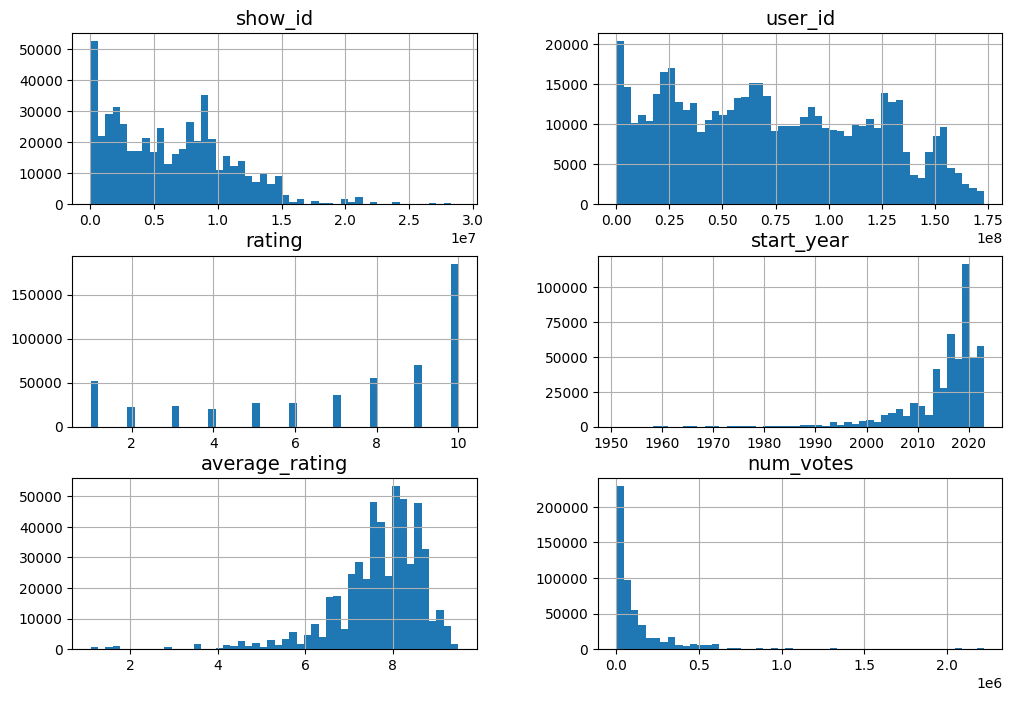

In [189]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

data.hist(bins=50, figsize=(12, 8))
plt.show()

In [190]:
train_set, test_set = get_split_data(0.2)

In [191]:
len(train_set)

413848

In [192]:
len(test_set)

103461

In [193]:
print(f"{train_set.iloc[0].show_id} {train_set.iloc[1].show_id}")

4354880 4955642


<Axes: >

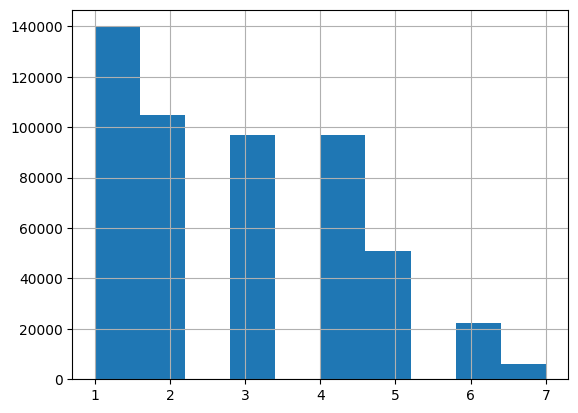

In [194]:
data['popularity'] = pd.cut(data['num_votes'], bins=[0, 25000, 50000, 100000, 250000, 500000, 1000000, np.inf], labels=[1, 2, 3, 4, 5, 6, 7])
data['popularity'].hist()

In [195]:
# Uniformly shuffle our data so that the sets have an equal distribution of popular and unpopular shows
# If we had one with all the popular shows and the other without, that would skew our model or our validation

whole_data_set = data.copy()
strat_train_set, strat_test_set = stratified_shuffle(data, "popularity")

strat_test_set["popularity"].value_counts() / len(strat_test_set)

popularity
1    0.269896
2    0.202267
3    0.187663
4    0.187093
5    0.098239
6    0.043456
7    0.011386
Name: count, dtype: float64

In [159]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop("popularity", axis=1, inplace=True)

# Visualize the data

In [160]:
data = strat_train_set.copy()

<Axes: xlabel='average_rating', ylabel='num_votes'>

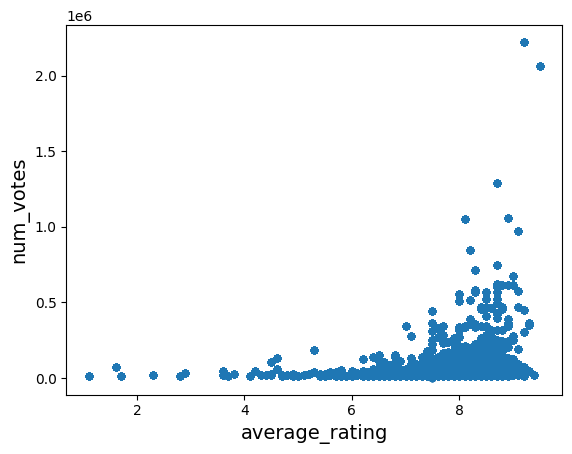

In [161]:
data.plot(kind="scatter", x="average_rating", y="num_votes")

In [162]:
corr_matrix = data.drop(["genres", "primary_title", "end_year"], axis=1).corr()

corr_matrix["rating"].sort_values(ascending=False)

rating            1.000000
average_rating    0.314931
user_id           0.107438
num_votes         0.056437
show_id          -0.029434
start_year       -0.106700
Name: rating, dtype: float64

array([[<Axes: xlabel='average_rating', ylabel='average_rating'>,
        <Axes: xlabel='start_year', ylabel='average_rating'>,
        <Axes: xlabel='num_votes', ylabel='average_rating'>],
       [<Axes: xlabel='average_rating', ylabel='start_year'>,
        <Axes: xlabel='start_year', ylabel='start_year'>,
        <Axes: xlabel='num_votes', ylabel='start_year'>],
       [<Axes: xlabel='average_rating', ylabel='num_votes'>,
        <Axes: xlabel='start_year', ylabel='num_votes'>,
        <Axes: xlabel='num_votes', ylabel='num_votes'>]], dtype=object)

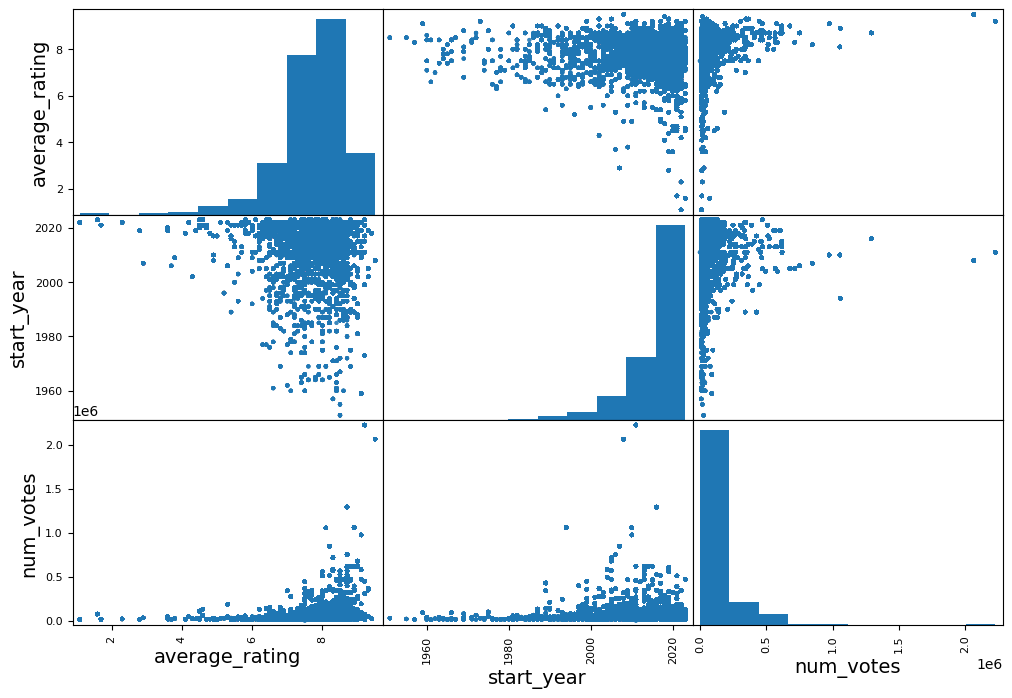

In [163]:
from pandas.plotting import scatter_matrix

attributes = ["average_rating", "start_year", "genres", "num_votes"]

scatter_matrix(data[attributes], figsize=(12, 8))

# Preparing data for our algorithms

In [164]:
# Let's generate (to start): { user_id, show_id, is_liked }
# If that doesn't work, consider adding other features: is_$GENRE, is_popular

data = strat_train_set.copy()

data_ratings = data[["rating"]]
data_ratings.value_counts()

rating
10        148115
9          56305
8          44108
1          41183
7          28644
5          21577
6          21513
3          18294
2          17859
4          16249
Name: count, dtype: int64

In [165]:
from sklearn.pipeline import Pipeline
from tv_show_recommender.transformers import AddIsLikedAttribute, DropColumns

add_is_liked_attr = AddIsLikedAttribute()
drop_columns = DropColumns(columns_to_drop=['rating', 'primary_title', 'start_year', 'end_year', 'genres', 'average_rating', 'num_votes'])

pipeline = Pipeline([
    ('add_is_liked_attr', add_is_liked_attr),
    ('drop_columns', drop_columns),
])

data_prepared = pipeline.fit_transform(data)

data_prepared.head()


show_id    user_id  is_liked
160700  19854762   48134010         0
8280     1236246   33704671         1
135037   9077540    3589319         0
76913    5555260  163393781         1
380662   5164196   94117410         1

# Select and train a model

In [356]:
from sklearn.neighbors import NearestNeighbors

data_processed = data_prepared.drop_duplicates(subset=['user_id', 'show_id'])
# We want each row to be the user's ratings for a particular show such that we can feed a new "user_row"
# with their preferences into the prediction algorithm
show_user_df = data_processed.pivot(index='user_id', columns='show_id', values='is_liked').fillna(0)

show_user_df.head()


show_id  43208     47708     50051     52520     53479     53488     53502     \
user_id                                                                         
11            0.0       0.0       0.0       0.0       0.0       0.0       0.0   
39            0.0       0.0       0.0       0.0       0.0       0.0       0.0   
436           0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1414          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
2043          0.0       0.0       0.0       0.0       0.0       0.0       0.0   

show_id  54533     55683     56751     ...  22014226  22074164  22185582  \
user_id                                ...                                 
11            0.0       0.0       0.0  ...       0.0       0.0       0.0   
39            0.0       0.0       0.0  ...       0.0       0.0       0.0   
436           0.0       0.0       0.0  ...       0.0       0.0       0.0   
1414          0.0       0.0       0.0  ...       0.0       0.0       0.0   
2043          0.0       0.0       0.0  ...       0.0       0.0       0.0   

show_id  22297578  22373148  23037654  23900194  26693803  28227737  28857177  
user_id                                                                        
11            0.0       0.0       0.0       0.0       0.0       0.0       0.0  
39            0.0       0.0       0.0       0.0       0.0       0.0       0.0  
436           0.0       0.0       0.0       0.0       0.0       0.0       0.0  
1414          0.0       0.0       0.0       0.0       0.0       0.0       0.0  
2043          0.0       0.0       0.0       0.0       0.0       0.0       0.0  

[5 rows x 1722 columns]

In [167]:
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(show_user_df.T)


NearestNeighbors(algorithm='brute', metric='cosine')

In [168]:
# The Wire
show_id = 306414
liked_shows = [show_id]
similar_shows_indices = []

show_index = show_user_df.columns.get_loc(show_id)
show_is_liked_series = show_user_df.iloc[:, show_index]

show_is_liked_values = show_is_liked_series.values.reshape(1, -1)

distances, indices = knn.kneighbors(show_is_liked_values, n_neighbors=3)
similar_shows_indices = indices.flatten().tolist()
similar_show_ids = show_user_df.columns[similar_shows_indices]

print(similar_show_ids)
# => The Sopranos, Breaking Bad


Index([306414, 141842, 903747], dtype='int64', name='show_id')


In [329]:
# How about multiple shows?

from tv_show_recommender.predictors import predict_nearest_neighbor

# The Wire, DS9, The Sopranos
liked_shows = [306414, 106145, 141842]

similar_show_ids = predict_nearest_neighbor(liked_shows, model=knn, df=show_user_df)

print(similar_show_ids)


1722
[92455, 112178, 979432, 903747]


In [352]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# So...how can we evaluate our algorithms?
# Evaluate user liked shows from test data against prediction algorithm
# E.g., given liked shows from test, see if algorithm generates shows the user likes in our training data

# Get our test data
test_data_prepared = pipeline.fit_transform(strat_test_set)
test_data_processed = test_data_prepared.drop_duplicates(subset=['user_id', 'show_id'])
test_show_user_df = test_data_processed.pivot(index='user_id', columns='show_id', values='is_liked').fillna(0)

# Pad the test data to have an equal # of users and shows
difference = len(show_user_df) - len(test_show_user_df)
missing_user_ids = [0] * difference
padded_rows = pd.DataFrame(0, columns=test_show_user_df.columns, index=missing_user_ids)
padded_rows['user_id'] = missing_user_ids
test_show_user_df = pd.concat([test_show_user_df, padded_rows.set_index('user_id')])

missing_columns = show_user_df.columns.difference(test_show_user_df.columns)

for column in missing_columns:
    test_show_user_df[column] = 0

test_show_user_df = test_show_user_df.copy()


def is_user_in_both_sets(user_id):
    if user_id in show_user_df.index and user_id in test_show_user_df.index:
        return True

    return False

def get_user_liked_shows_from_test(user_id):
     return test_show_user_df.columns[test_show_user_df.loc[user_id] == 1].tolist()

def get_user_liked_shows_from_train(user_id):
    return show_user_df.columns[show_user_df.loc[user_id] == 1].tolist()

def precision_at_k(actual_liked_items, recommended_items, k):
    recommended_items_cross_section = []

    for actual_liked_item in actual_liked_items:
        if actual_liked_item in recommended_items:
            recommended_items_cross_section.append(actual_liked_item)
        else:
            recommended_items_cross_section.append(0)

    num_relevant_recommendations = len(set(actual_liked_items) & set(recommended_items_cross_section))

    precision = num_relevant_recommendations / k if k > 0 else 0
    return precision


precision_scores = []

at_least_3_liked_shows = test_show_user_df[test_show_user_df.eq(1.0).sum(axis=1) >= 3]

for user_id, df in at_least_3_liked_shows.groupby("user_id"):
    if not is_user_in_both_sets(user_id):
        continue

    test_user_liked_shows = get_user_liked_shows_from_test(user_id)

    if len(test_user_liked_shows) == 0:
        continue

    actual_user_liked_shows = get_user_liked_shows_from_train(user_id)
    recommended_shows = predict_nearest_neighbor(test_user_liked_shows, model=knn, df=test_show_user_df)

    precision_score = precision_at_k(actual_user_liked_shows, recommended_shows, 1)
    precision_scores.append(precision_score)

mean_precision = np.mean(precision_scores)

print("Mean Precision:", mean_precision) # 0.1427

/var/folders/0p/jtbnm2_n28v73m_gyzk0grxw0000gn/T/ipykernel_63668/2945779066.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_show_user_df[column] = 0


0
4
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
1
0
0
0
0
0
2
1
0
1
0
0
2
0
5
0
10
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
3
0
0
0
0
0
0
0
0
0
0
1
0
0
2
0
0
0
0
0
0
0
1
6
0
0
0
0
0
0
0
0
0
0
0
4
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
4
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
3
0
0
0
0
4
0
2
0
0
0
0
0
2
0
1
3
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
9
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
2
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
4
0
0
0
0
0
0
0
0
2
0
0
0
0
1
0
5
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0

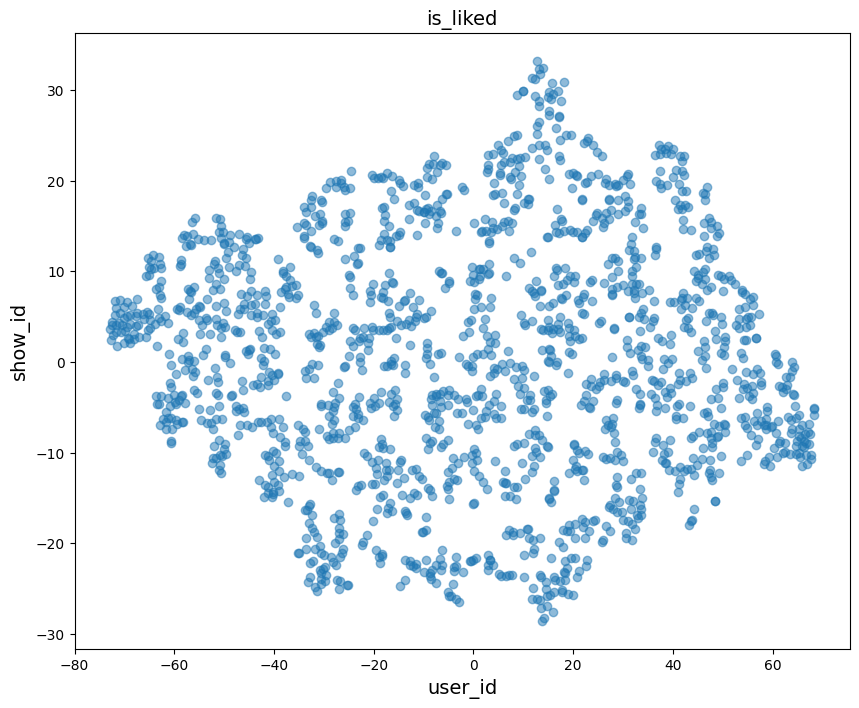

In [374]:
# Can we visualize our collaborative filtering model?

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

similarities = knn.kneighbors(show_user_df.T, return_distance=False)

tsne = TSNE(n_components=2, random_state=42)
embedded_similarities = tsne.fit_transform(similarities)

# Plot the visualization
plt.figure(figsize=(10, 8))
plt.scatter(embedded_similarities[:, 0], embedded_similarities[:, 1], alpha=0.5)
plt.title('is_liked')
plt.xlabel('user_id')
plt.ylabel('show_id')
plt.show()

# Now select and train a different model

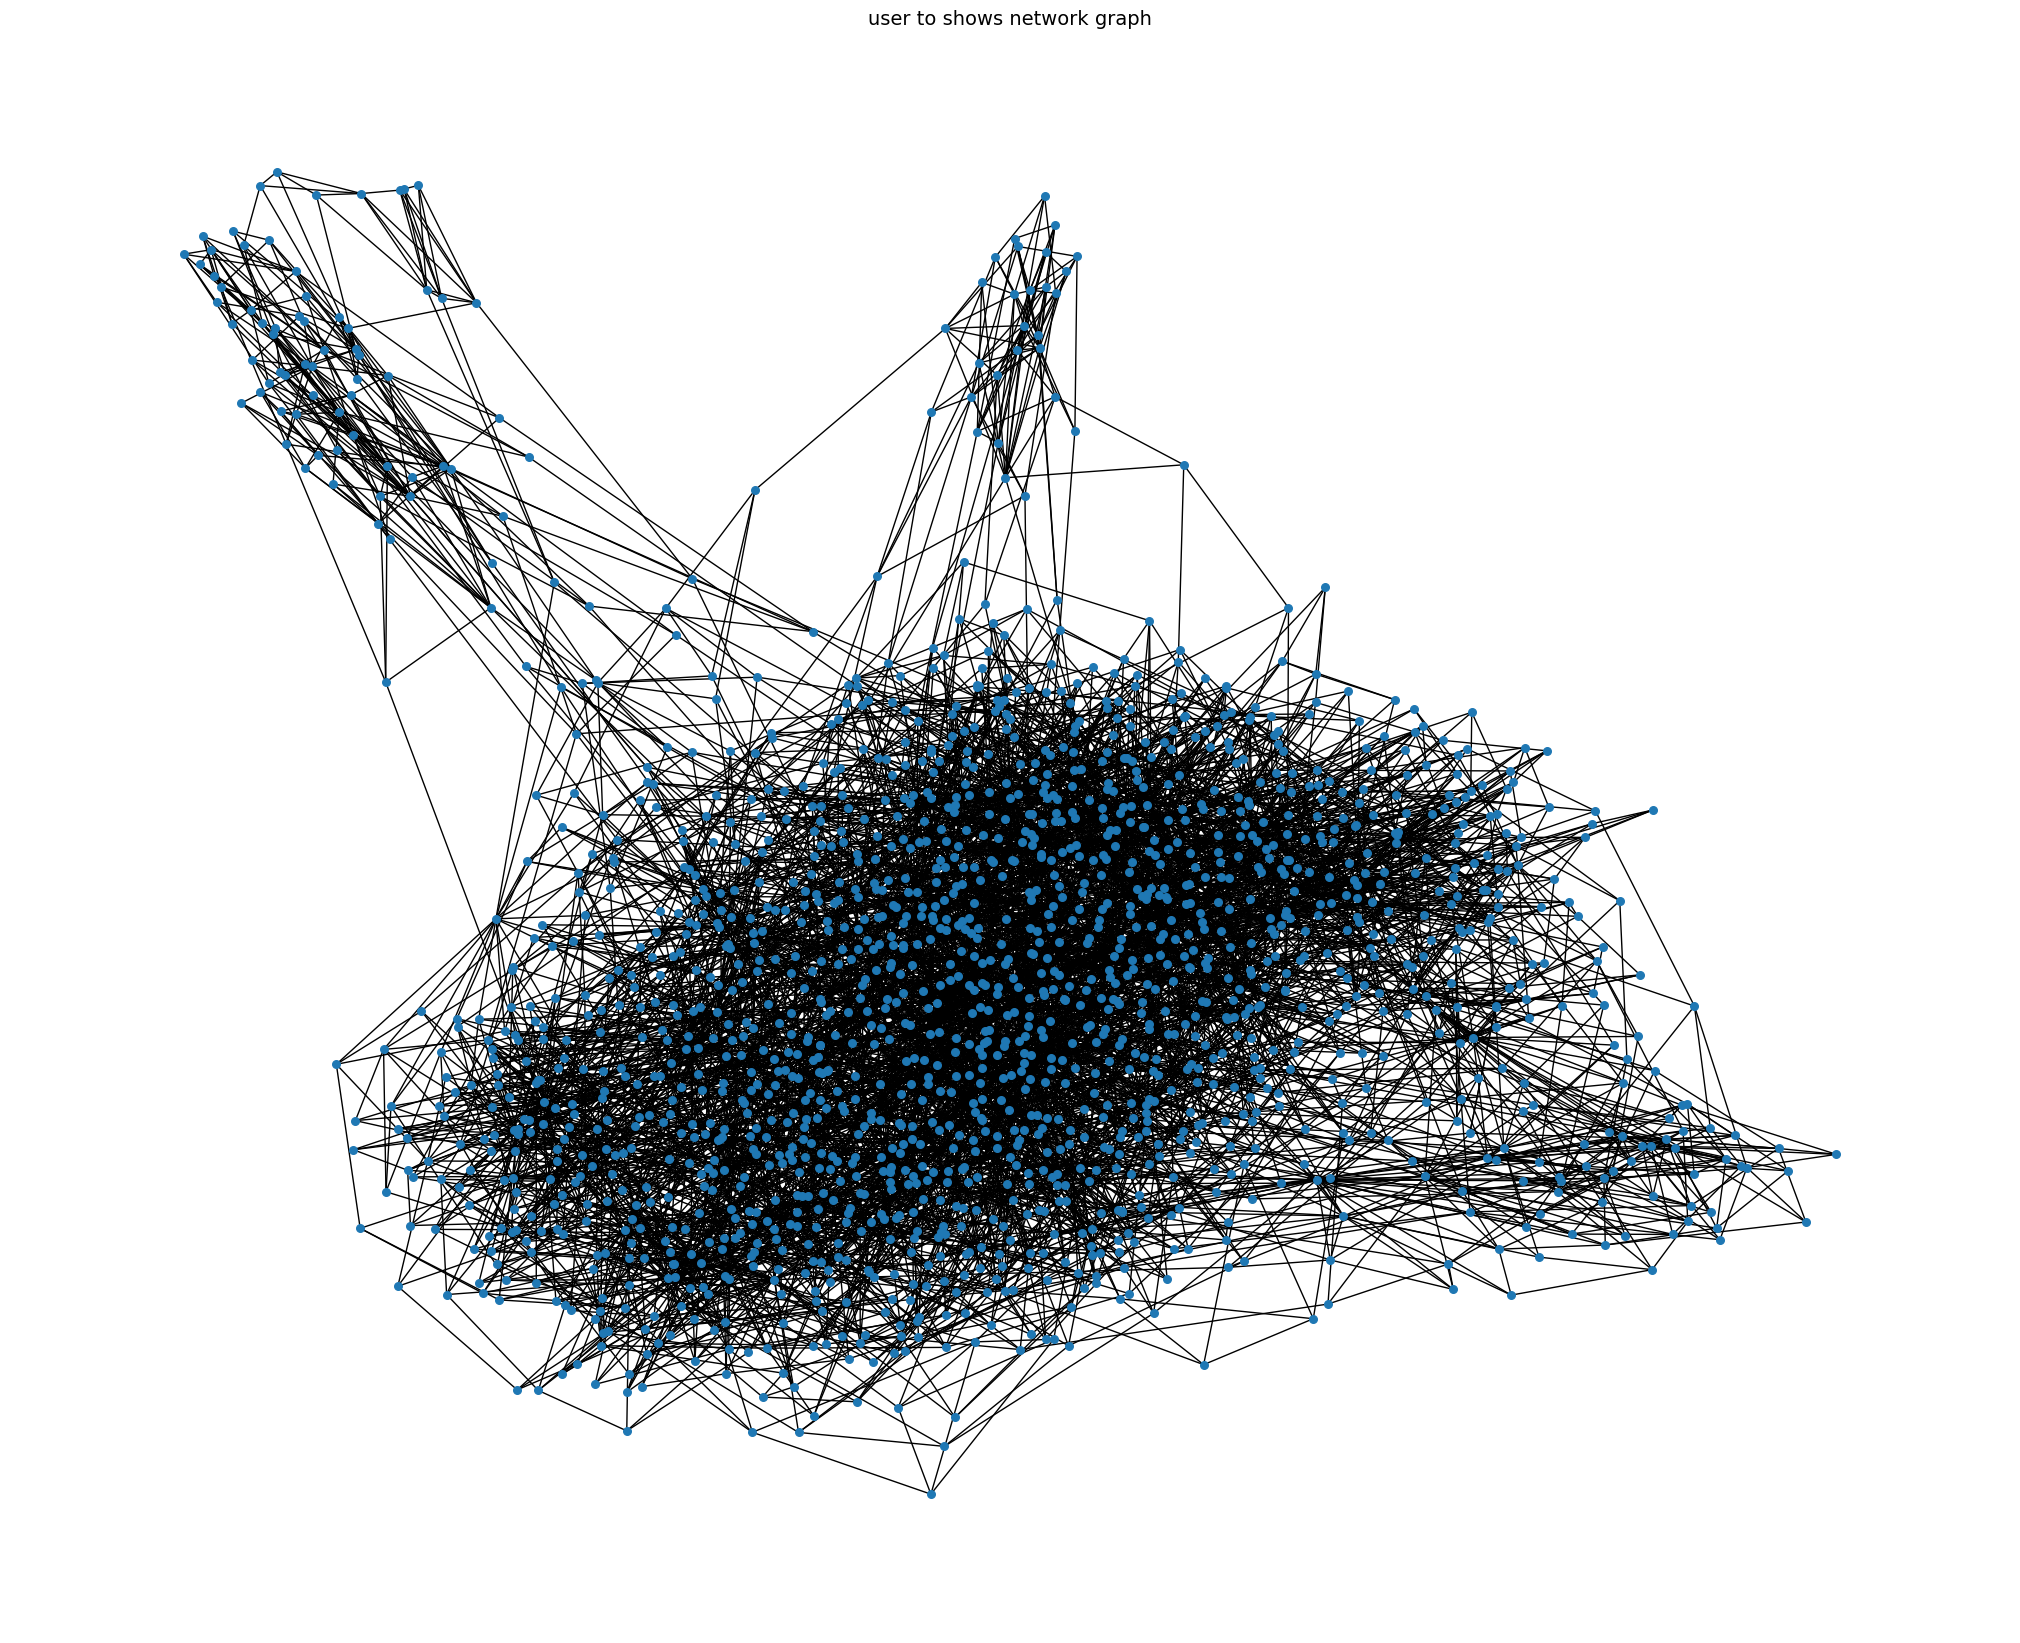

In [400]:
# What about a network graph?

import networkx as nx

G = nx.Graph()

# Add nodes to the graph
for i in range(len(show_user_df.T)):
    G.add_node(i)  # Each node represents an item/user

# Add edges based on similarities
for i, neighbors in enumerate(similarities):
    for neighbor in neighbors[1:]:  # Skip the first neighbor as it's itself
        G.add_edge(i, neighbor, weight=1)  # You can use similarity scores as edge weights

# Visualize the network graph
plt.figure(figsize=(20, 16))
pos = nx.spring_layout(G)  # Layout algorithm to position nodes
nx.draw(G, pos, with_labels=False, node_size=30)
plt.title('user to shows network graph')
plt.show()

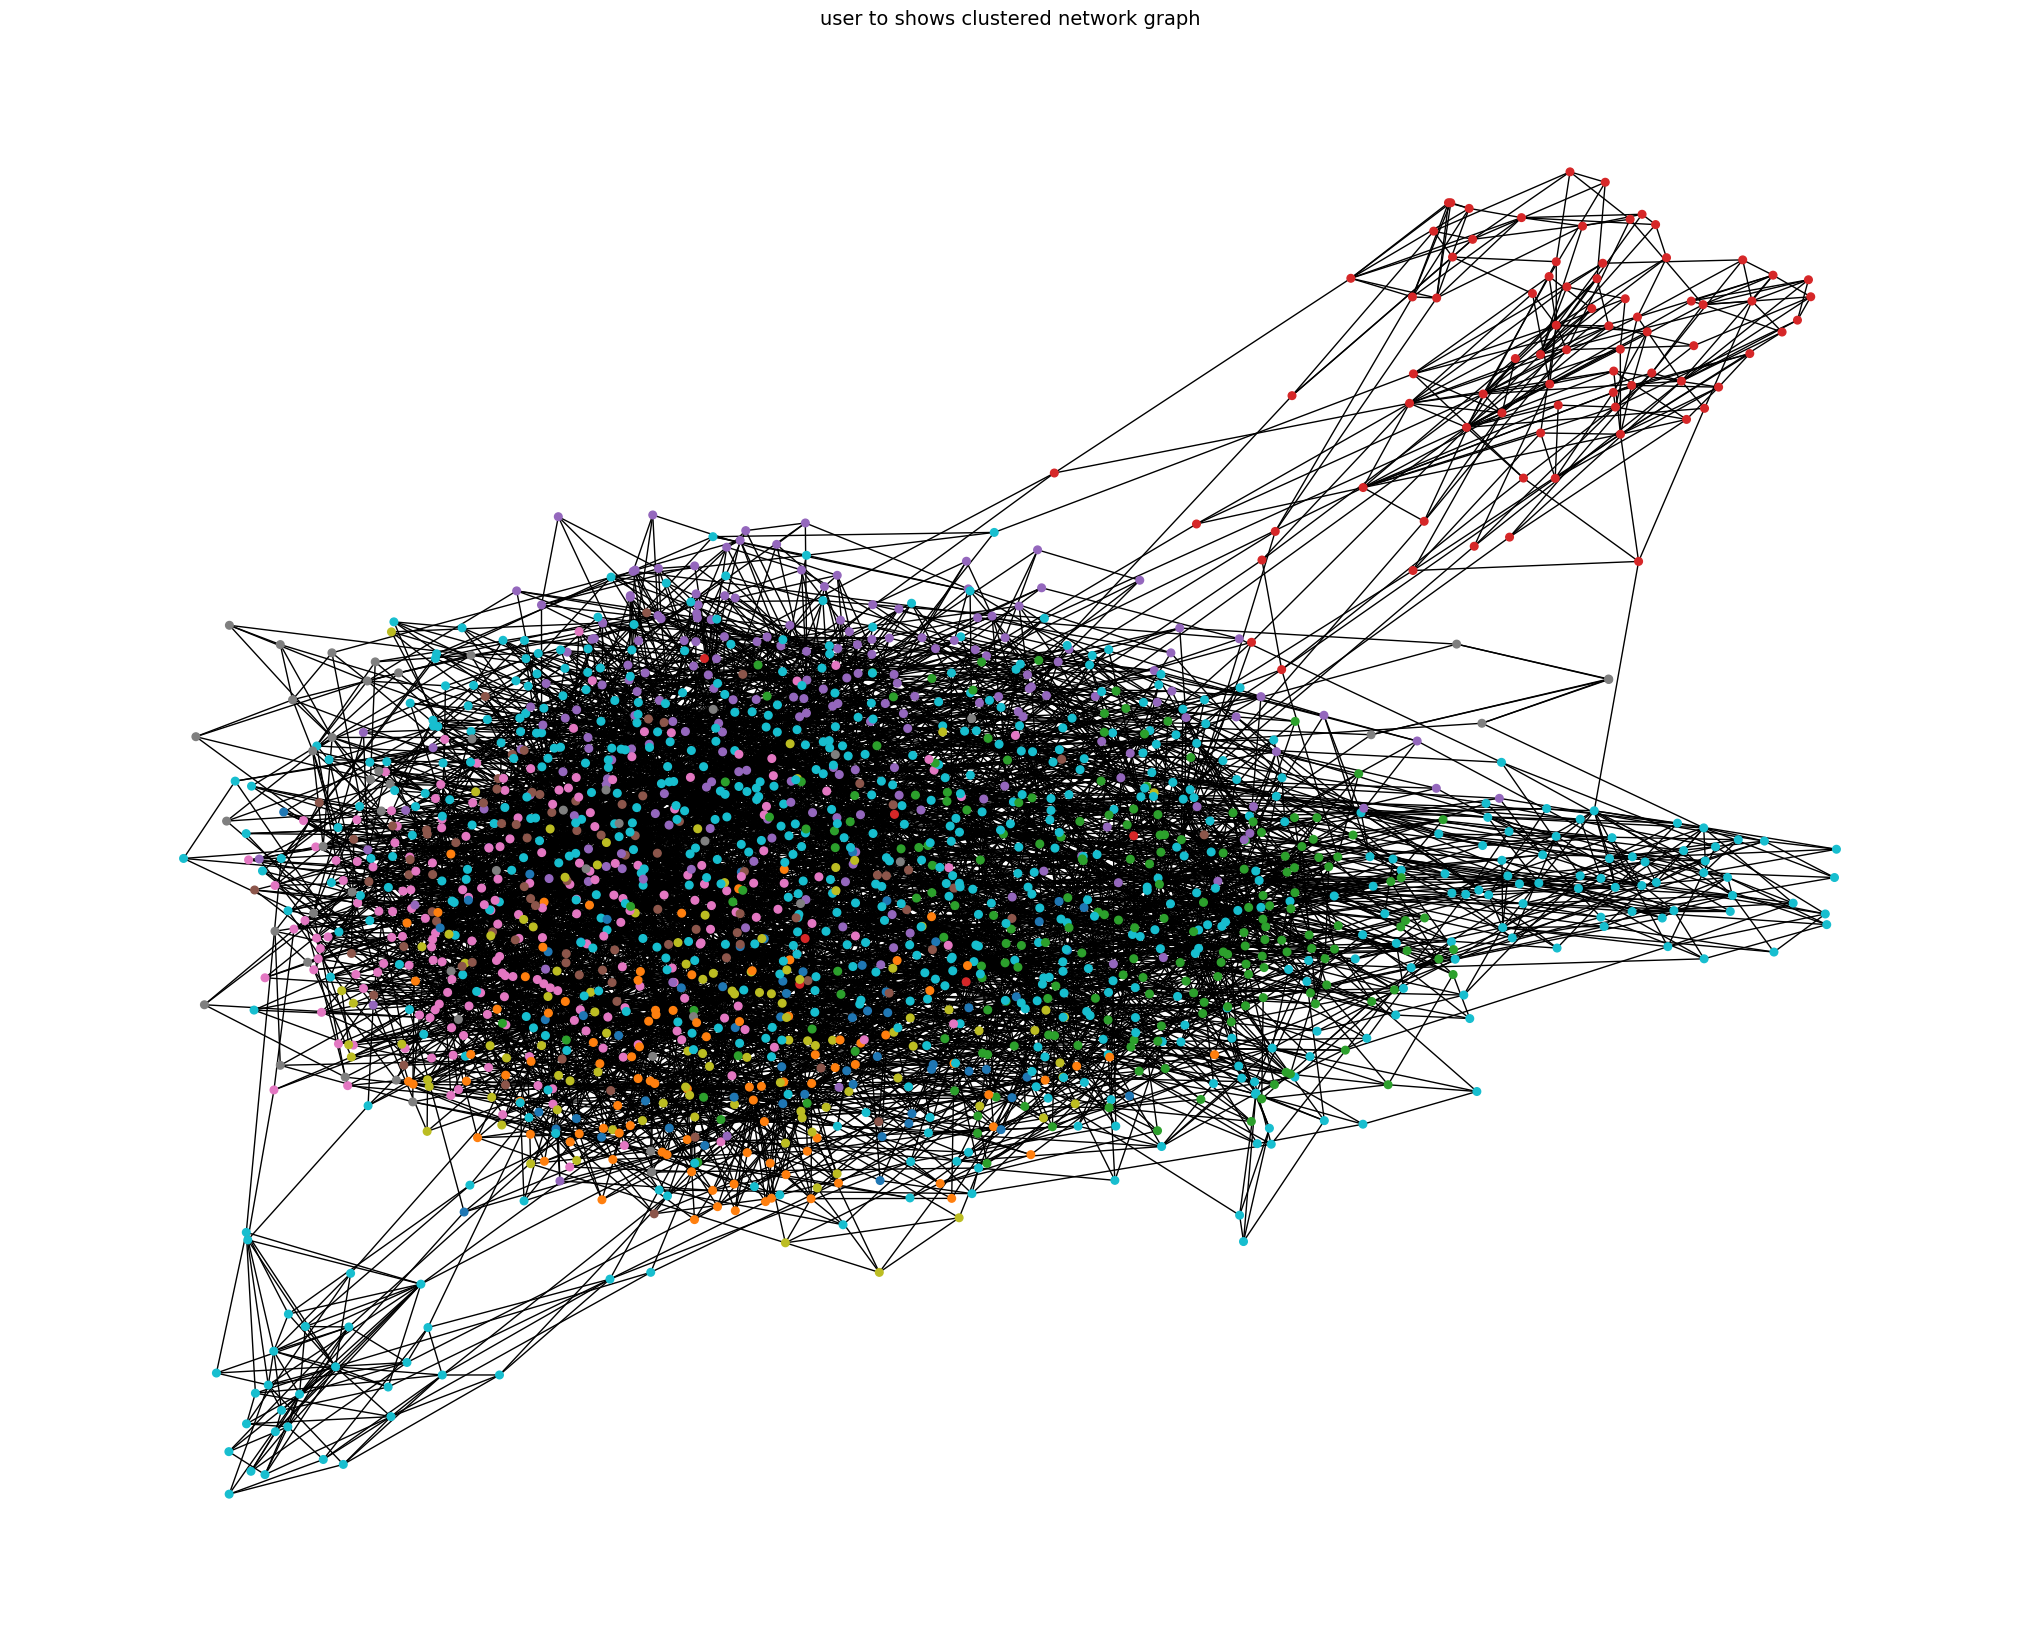

In [401]:
# How about a clustered network graph?

import community
import matplotlib.cm as cm

# Compute the best partition using the Louvain algorithm
partition = community.best_partition(G)

# Assign cluster information to nodes
for node, cluster_id in partition.items():
    G.nodes[node]['cluster'] = cluster_id
    G.nodes[node]['show_index'] = node

# Visualize the clustered network graph
plt.figure(figsize=(20, 16))
pos = nx.spring_layout(G, seed=42)

# Assign colors to nodes based on their clusters
node_colors = [cm.tab10(partition[node]) for node in G.nodes()]
nx.draw(G, pos, with_labels=False, node_color=node_colors, node_size=30)
plt.title('user to shows clustered network graph')
plt.show()

In [402]:
# So, there are an obvious number of distinct clusters:
# red, blue, green, orange, pink, lightgreen, brown, darkblue, ..., from observation
# Let's try to retrieve the number of partitions (and some sample data from each for fun)
# Maybe we can use the # of partitions in a KMeans model test

def retrieve_data_by_partition(graph, partition_dict):
    data_by_partition = {}
    for node, partition_id in partition_dict.items():
        if partition_id not in data_by_partition:
            data_by_partition[partition_id] = []
        # Assuming 'data' is the attribute containing the data you want to retrieve
        if 'show_index' in graph.nodes[node]:
            data_by_partition[partition_id].append(graph.nodes[node]['show_index'])
    return data_by_partition

def get_show_ids_from_indexes(show_indexes = []):
    ids = []
    for index in show_indexes:
        id = show_user_df.columns[index]
        ids.append(id)
    return ids

data_by_partition = retrieve_data_by_partition(G, partition)

for partition_id, data_samples in data_by_partition.items():
    print(f"Partition {partition_id}: {len(data_samples)} samples")
    print("First few samples:")
    print(get_show_ids_from_indexes(data_samples[:5]))
    print("---------")

# 15 partitions
# From investigating the data, a lot of these shows seem grouped by start_date
# They also seem grouped by genre (e.g. sci-fi nerds like other sci-fi shows)

Partition 11: 133 samples
First few samples:
[43208, 86661, 86765, 90509, 92379]
---------
Partition 1: 97 samples
First few samples:
[47708, 73972, 88527, 98800, 101205]
---------
Partition 6: 200 samples
First few samples:
[50051, 52520, 53479, 54533, 57729]
---------
Partition 8: 104 samples
First few samples:
[53488, 55683, 71007, 75488, 75529]
---------
Partition 4: 212 samples
First few samples:
[53502, 57733, 57751, 58815, 63950]
---------
Partition 5: 86 samples
First few samples:
[56751, 63939, 71075, 72500, 81912]
---------
Partition 0: 61 samples
First few samples:
[72562, 115083, 238784, 319931, 319969]
---------
Partition 13: 97 samples
First few samples:
[77003, 86662, 98763, 98948, 103442]
---------
Partition 10: 106 samples
First few samples:
[88509, 139774, 187636, 229889, 297494]
---------
Partition 14: 29 samples
First few samples:
[98904, 106052, 108778, 115369, 165581]
---------
Partition 2: 203 samples
First few samples:
[115082, 118421, 141842, 264235, 286486]
--

In [403]:
# Let's try using a clustering algorithm then to compare against our nearest neighbors algorithm